# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

** Read in the csv file as a dataframe called df **

In [25]:
df = pd.read_csv('E:/Refactored_Py_DS_ML_Bootcamp-master/10-Data-Capstone-Projects/911.csv')

** Check the info() of the df **

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **



In [30]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **



In [31]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [32]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [35]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic.

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [46]:
df['Reason'] =df['title'].str.split(':',expand=True)[0]

In [48]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


** What is the most common Reason for a 911 call based off of this new column? **

In [49]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

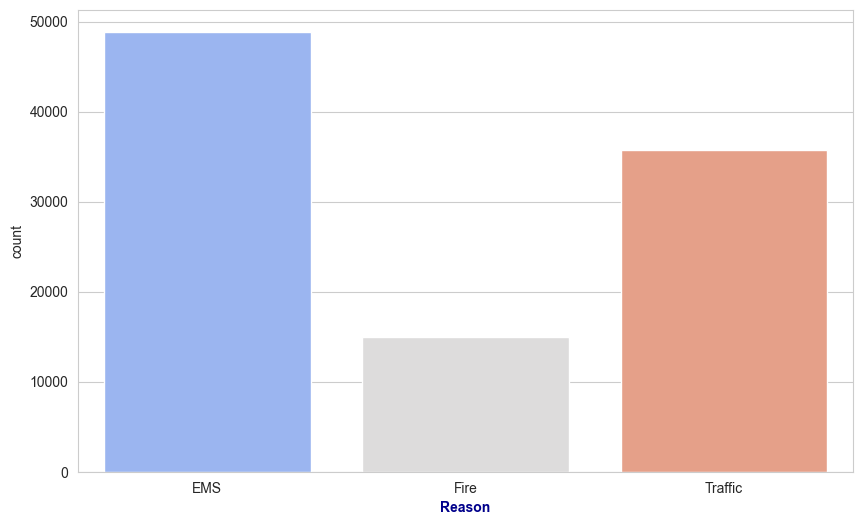

In [133]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df,x=df['Reason'],palette='coolwarm',hue='Reason')

plt.xlabel('Reason', fontweight='bold', color='darkblue')

plt.show()

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [70]:
type(df['timeStamp'].iloc[0])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [73]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [83]:
time = df['timeStamp'].iloc[0]

df['Hour'] = time.hour

df['Month'] = df['timeStamp'].dt.month_name()

df['Day'] = df['timeStamp'].dt.day_name()

In [84]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day,Hour,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thursday,17,December
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thursday,17,December
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Thursday,17,December
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thursday,17,December
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thursday,17,December


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

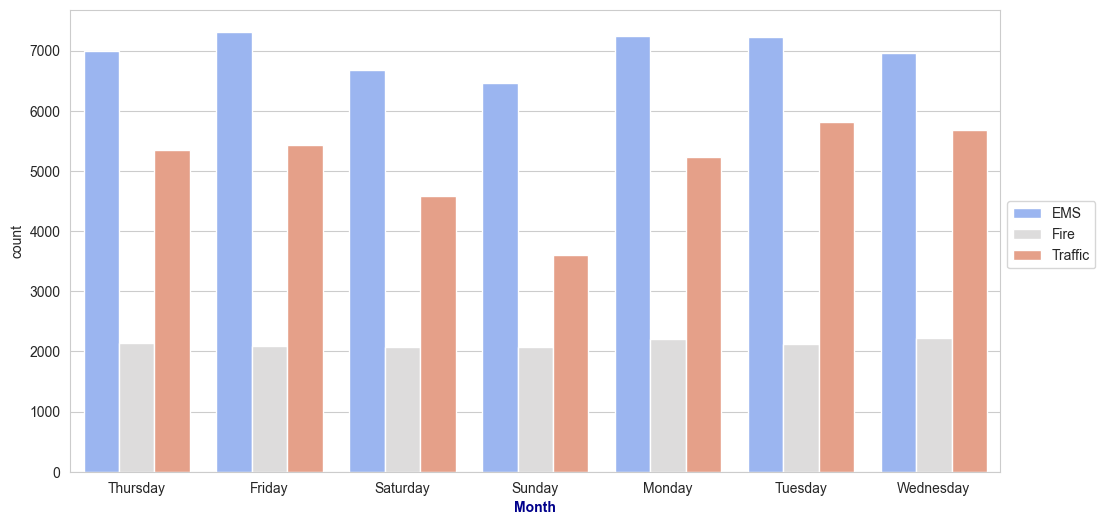

In [130]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df,x=df['Day'],hue=df['Reason'],palette='coolwarm')

plt.legend(bbox_to_anchor=(1, .6))

plt.xlabel('Month', fontweight='bold', color='darkblue')

plt.show()

**Now do the same for Month:**

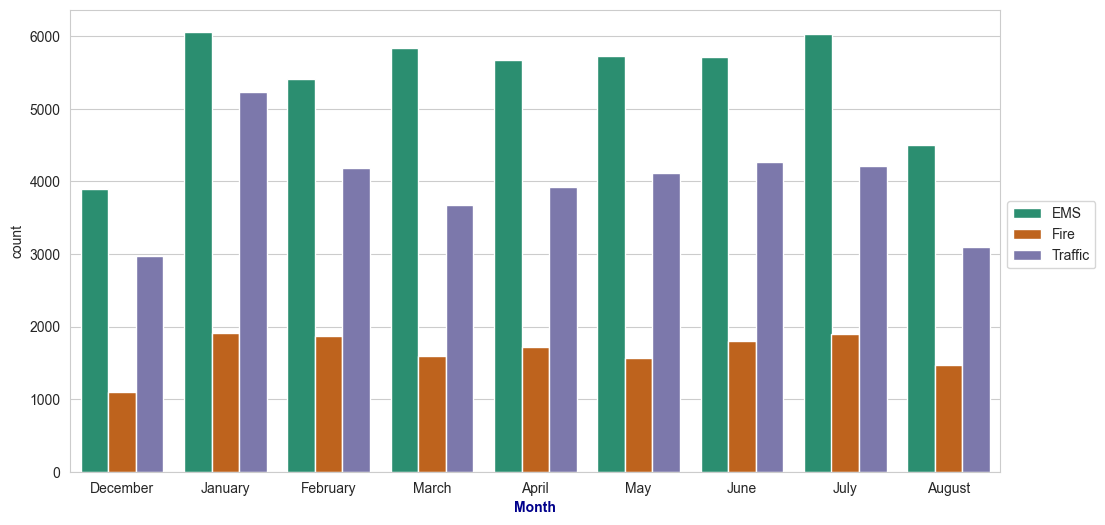

In [129]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df,x=df['Month'],hue=df['Reason'],palette='Dark2')

plt.legend(bbox_to_anchor=(1, .6))

plt.xlabel('Month', fontweight='bold', color='darkblue')

plt.show()

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [109]:
by_month = df.groupby('Month').count()

by_month

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day,Hour
Month,,,,,,,,,,,,
April,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
August,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
December,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969
February,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
January,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
July,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
June,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
March,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
May,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


In [168]:
# Reset the index to convert 'Month' from index to a column
by_month = by_month.reset_index()

# Convert the 'Month' names into numbers
by_month['Month_num'] = pd.to_datetime(by_month['Month'], format='%B').dt.month

# Display the updated DataFrame
by_month

,Month_num,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day,Hour
0,1,January,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,February,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,March,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,April,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,May,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,June,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,July,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,August,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,December,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

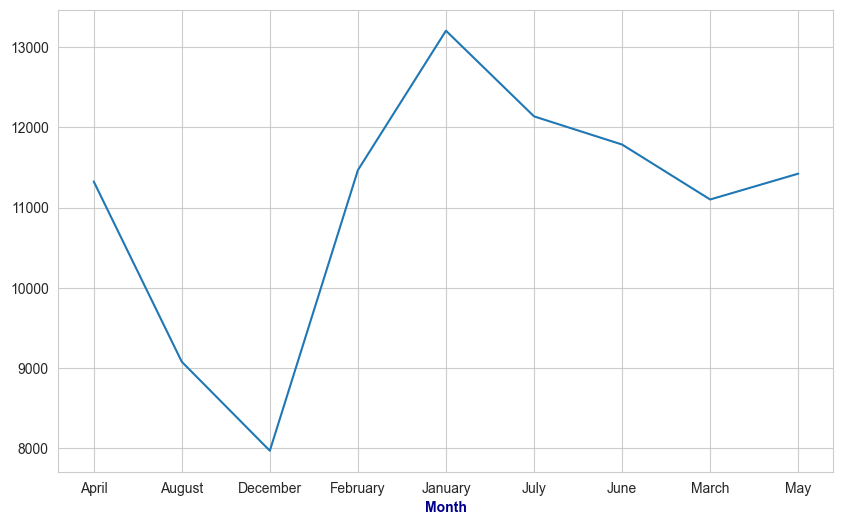

In [128]:
plt.figure(figsize=(10,6))

by_month['Day'].plot()

plt.xlabel('Month', fontweight='bold', color='darkblue')

plt.show()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

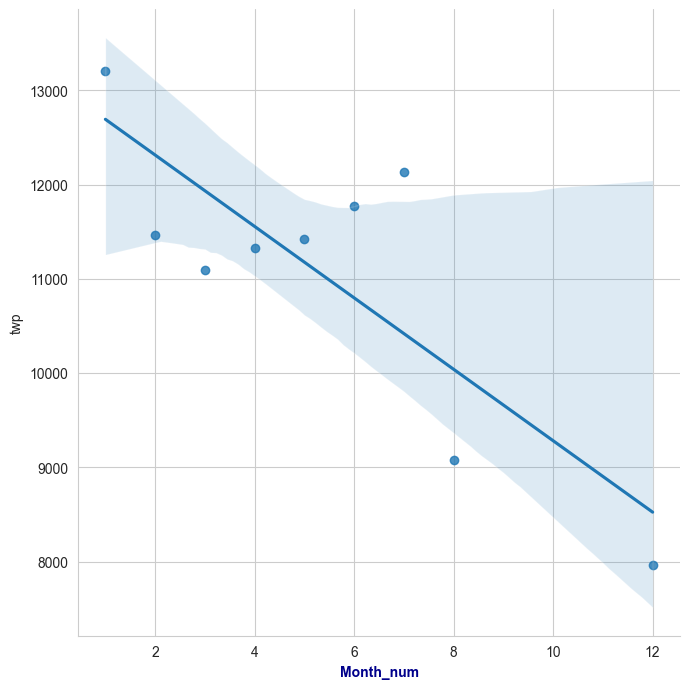

In [178]:
sns.lmplot(data=by_month,x='Month_num',y='twp',height=7)

plt.xlabel('Month_num', fontweight='bold', color='darkblue')

plt.show()


**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [ ]:
df['Date'] = df['timeStamp'].dt.date

In [187]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day,Hour,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thursday,17,December,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thursday,17,December,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Thursday,17,December,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thursday,17,December,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thursday,17,December,2015-12-10


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

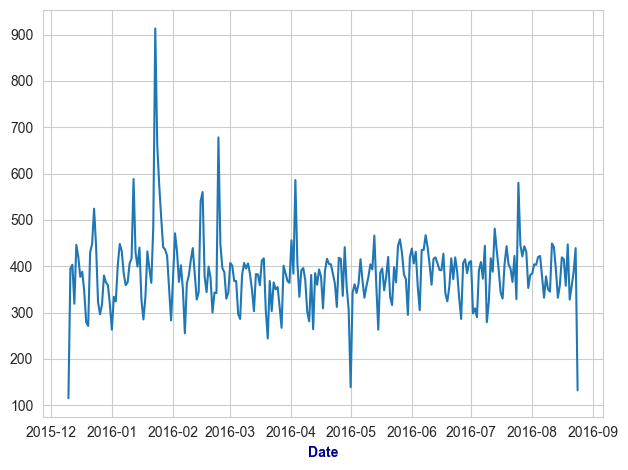

In [207]:
df_Date = df.groupby('Date').count()

df_Date['twp'].plot()

plt.xlabel('Date', fontweight='bold', color='darkblue')

plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

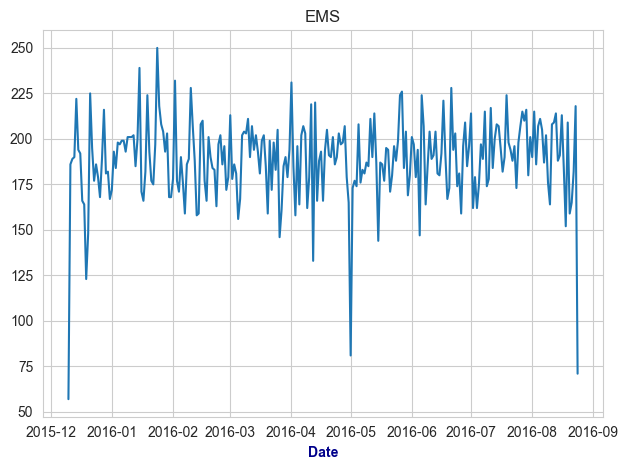

In [206]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()

plt.title('EMS')

plt.xlabel('Date', fontweight='bold', color='darkblue')

plt.tight_layout()

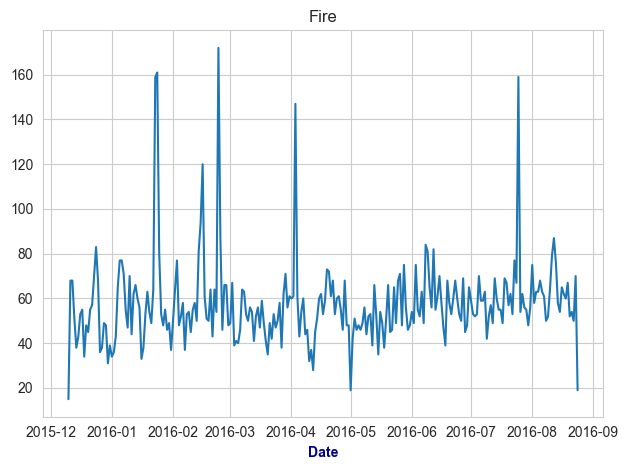

In [208]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()

plt.title('Fire')

plt.xlabel('Date', fontweight='bold', color='darkblue')

plt.tight_layout()

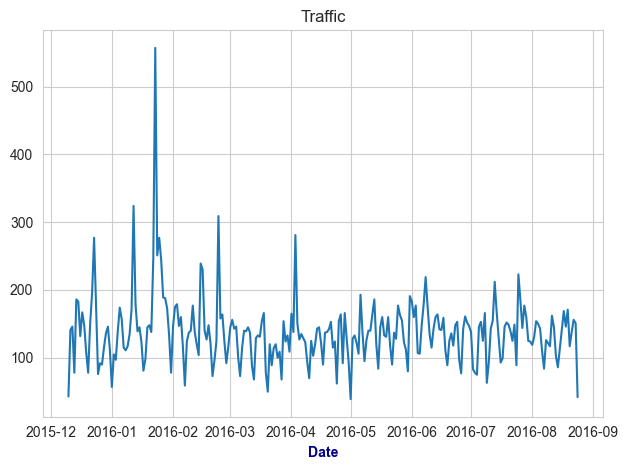

In [209]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()

plt.title('Traffic')

plt.xlabel('Date', fontweight='bold', color='darkblue')

plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [239]:
day_hour = df.groupby(by=['Day','Hour'])['Reason'].count().unstack()

day_hour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

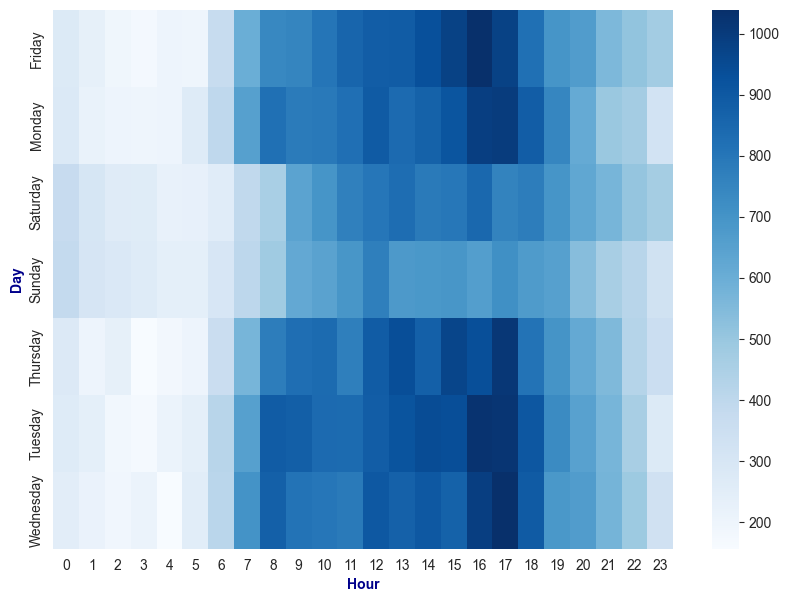

In [240]:
plt.figure(figsize=(10,7))

sns.heatmap(data=day_hour,cmap='Blues')

plt.xlabel('Hour', fontweight='bold', color='darkblue')

plt.ylabel('Day', fontweight='bold', color='darkblue')

plt.show()

** Now create a clustermap using this DataFrame. **

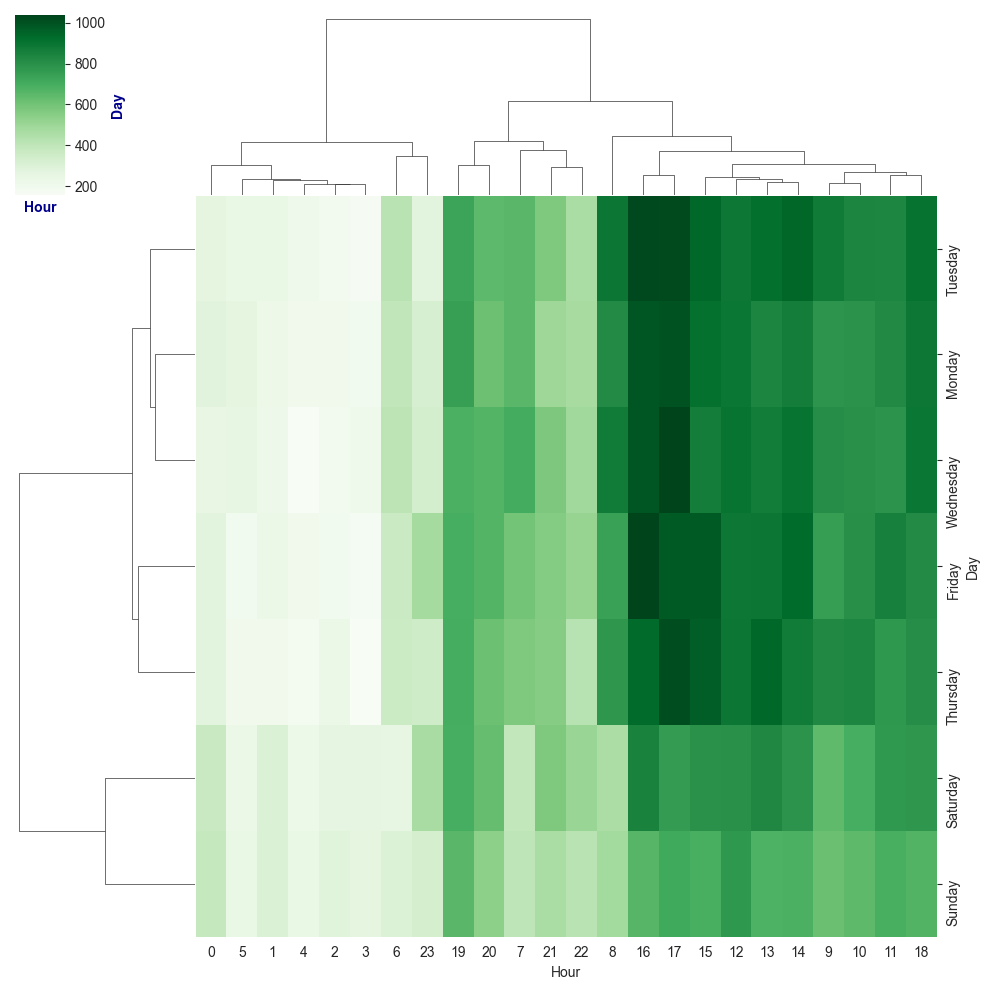

In [244]:
sns.clustermap(data=day_hour,cmap='Greens')

plt.xlabel('Hour', fontweight='bold', color='darkblue')

plt.ylabel('Day', fontweight='bold', color='darkblue')

plt.show()

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [245]:
day_month = df.groupby(by=['Day','Month'])['Reason'].count().unstack()

day_month.head()

Month,April,August,December,February,January,July,June,March,May
Day,,,,,,,,,
Friday,1958,1310,1065,1581,1970,2045,1649,1525,1730
Monday,1598,1511,1257,1964,1727,1692,1617,1535,1779
Saturday,1734,1099,978,1441,2291,1695,1388,1266,1444
Sunday,1488,1021,907,1229,1960,1672,1333,1102,1424
Thursday,1601,1230,1266,1596,1584,1646,2065,1900,1590


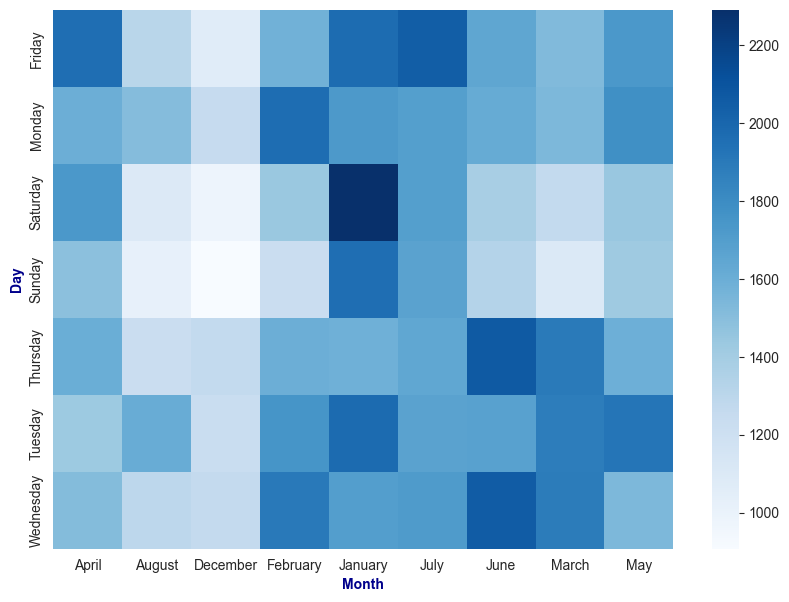

In [246]:
plt.figure(figsize=(10,7))

sns.heatmap(data=day_month,cmap='Blues')

plt.xlabel('Month', fontweight='bold', color='darkblue')

plt.ylabel('Day', fontweight='bold', color='darkblue')

plt.show()

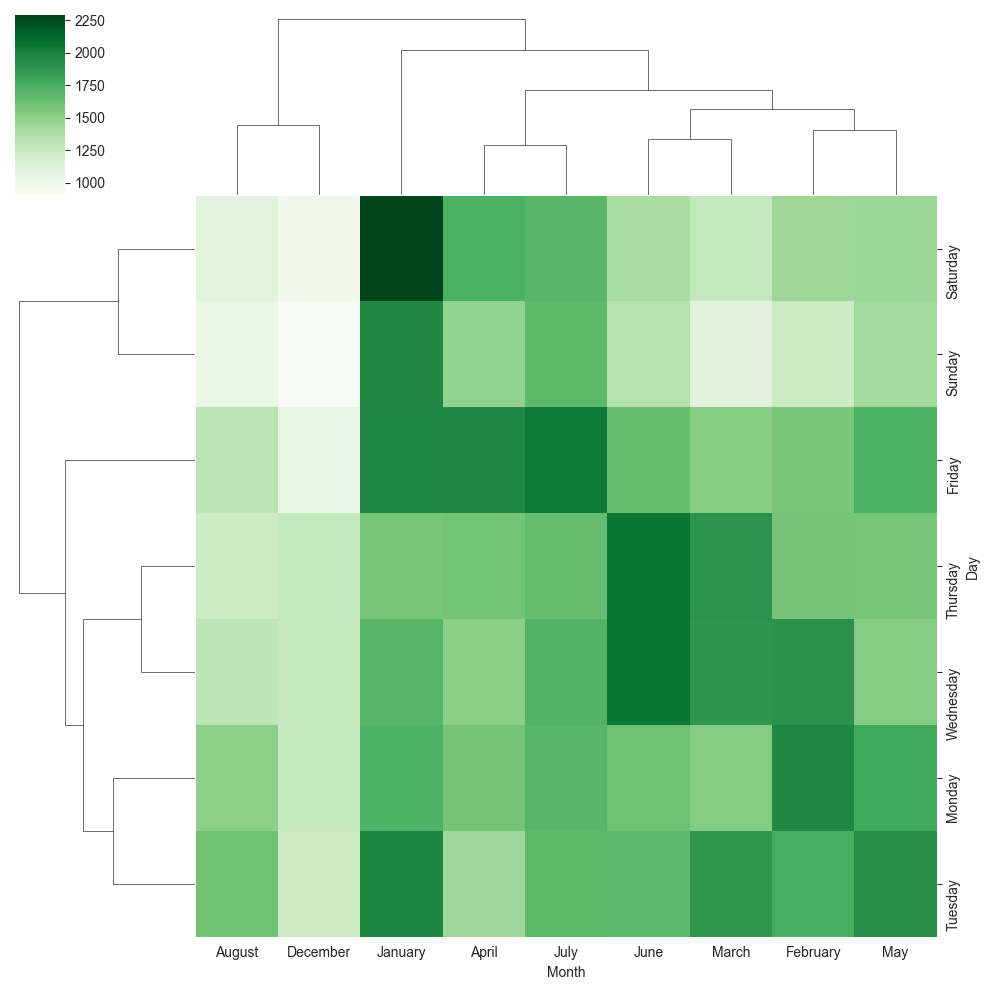

In [248]:
sns.clustermap(data=day_month,cmap='Greens')

plt.show()